# Logistic regression


- It comes under supervised ML,and used to solve Binary Classification
- It is used to find probability of a categorical dependent variable
- eg;-cancerous,diabetic,Loan prediction,Titanic,Cardiac


# Assumptions of Logistic Regression

- Target variable should be Binary i.e., Yes/No, 0 and 1
- No or multicollinearity
- Outliers should not be there
- It should have huge dataset i.e it should not have more columns than rows
- Data should be Linearly separable

# How logistic regression works.?

- 1.Problem Statement
- 2.Data
- 3.Find relationship among independent variables and fit a line
   y = m1x1+m2x2+m3x3+....+c
- 4.When we predict values using above equation it will give values other than 0 and 1
- 5. To transform real values to lie between 0 and 1
  we use sigmoid function ha(x)=1/1+e power -z
  ha(x)=1/1+e power -[m1x1+m2x2+m3x3]
- 6. Set a threshold 
  ha(x)>=0.5 --> y=1
  ha(x)<0.5 --> y=0

# Problem statement
- Predict whether the person is diabetic or non diabetic

In [1]:
# Importing basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data

data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Basic checks

print('Data shape')
print(data.shape)

print('columns')
print(data.columns)

print('Head')
print(data.head())

print('tail')
print(data.tail())

print('Data types')
print(data.dtypes)

print('Info')
print(data.info())

print(data.select_dtypes(include=['int','float']))

print(data.select_dtypes(include='object'))

Data shape
(768, 9)
columns
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Head
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
tail
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101     

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
# Insights

# The average age of patients is 33,min age is 21,max age is 81.
# Maximum blood pressure of patients is 122.
# Maximum Insukin level is 846.
# Max glucose is 199.
# Max BMI is 67.
# The minimum value of Glucose ,BP, Skin thickness , Insulin and BMI is 0,
# According to the studies it says that these columns cannot have the value as 0.

In [7]:
# Check for null values

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# The data has no null values

In [9]:
# Find unique values in outcome

data.Outcome.unique()

array([1, 0], dtype=int64)

In [10]:
data['Outcome'].unique()

array([1, 0], dtype=int64)

In [11]:
# Outcome has two categories 
# 1 --> person is diabetic 
# 0 --> person is non-diabetic

In [12]:
# check for value counts
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
# Clearly data is imbalanced
# There are more observations related to non diabetic and very less observations related to diabetic patients

# EDA(Exploratory Data Analysis)


## Univariate analysis

<AxesSubplot:xlabel='Outcome', ylabel='count'>

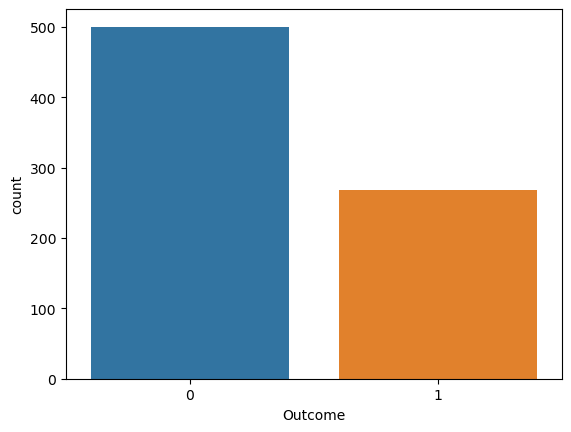

In [14]:
# check whether data is balanced or not
sns.countplot(data=data,x='Outcome')

In [15]:
# Data is not balanced 
# This data has more observations related to non diabetic patients related to non diabetic and less observations on daiabetic

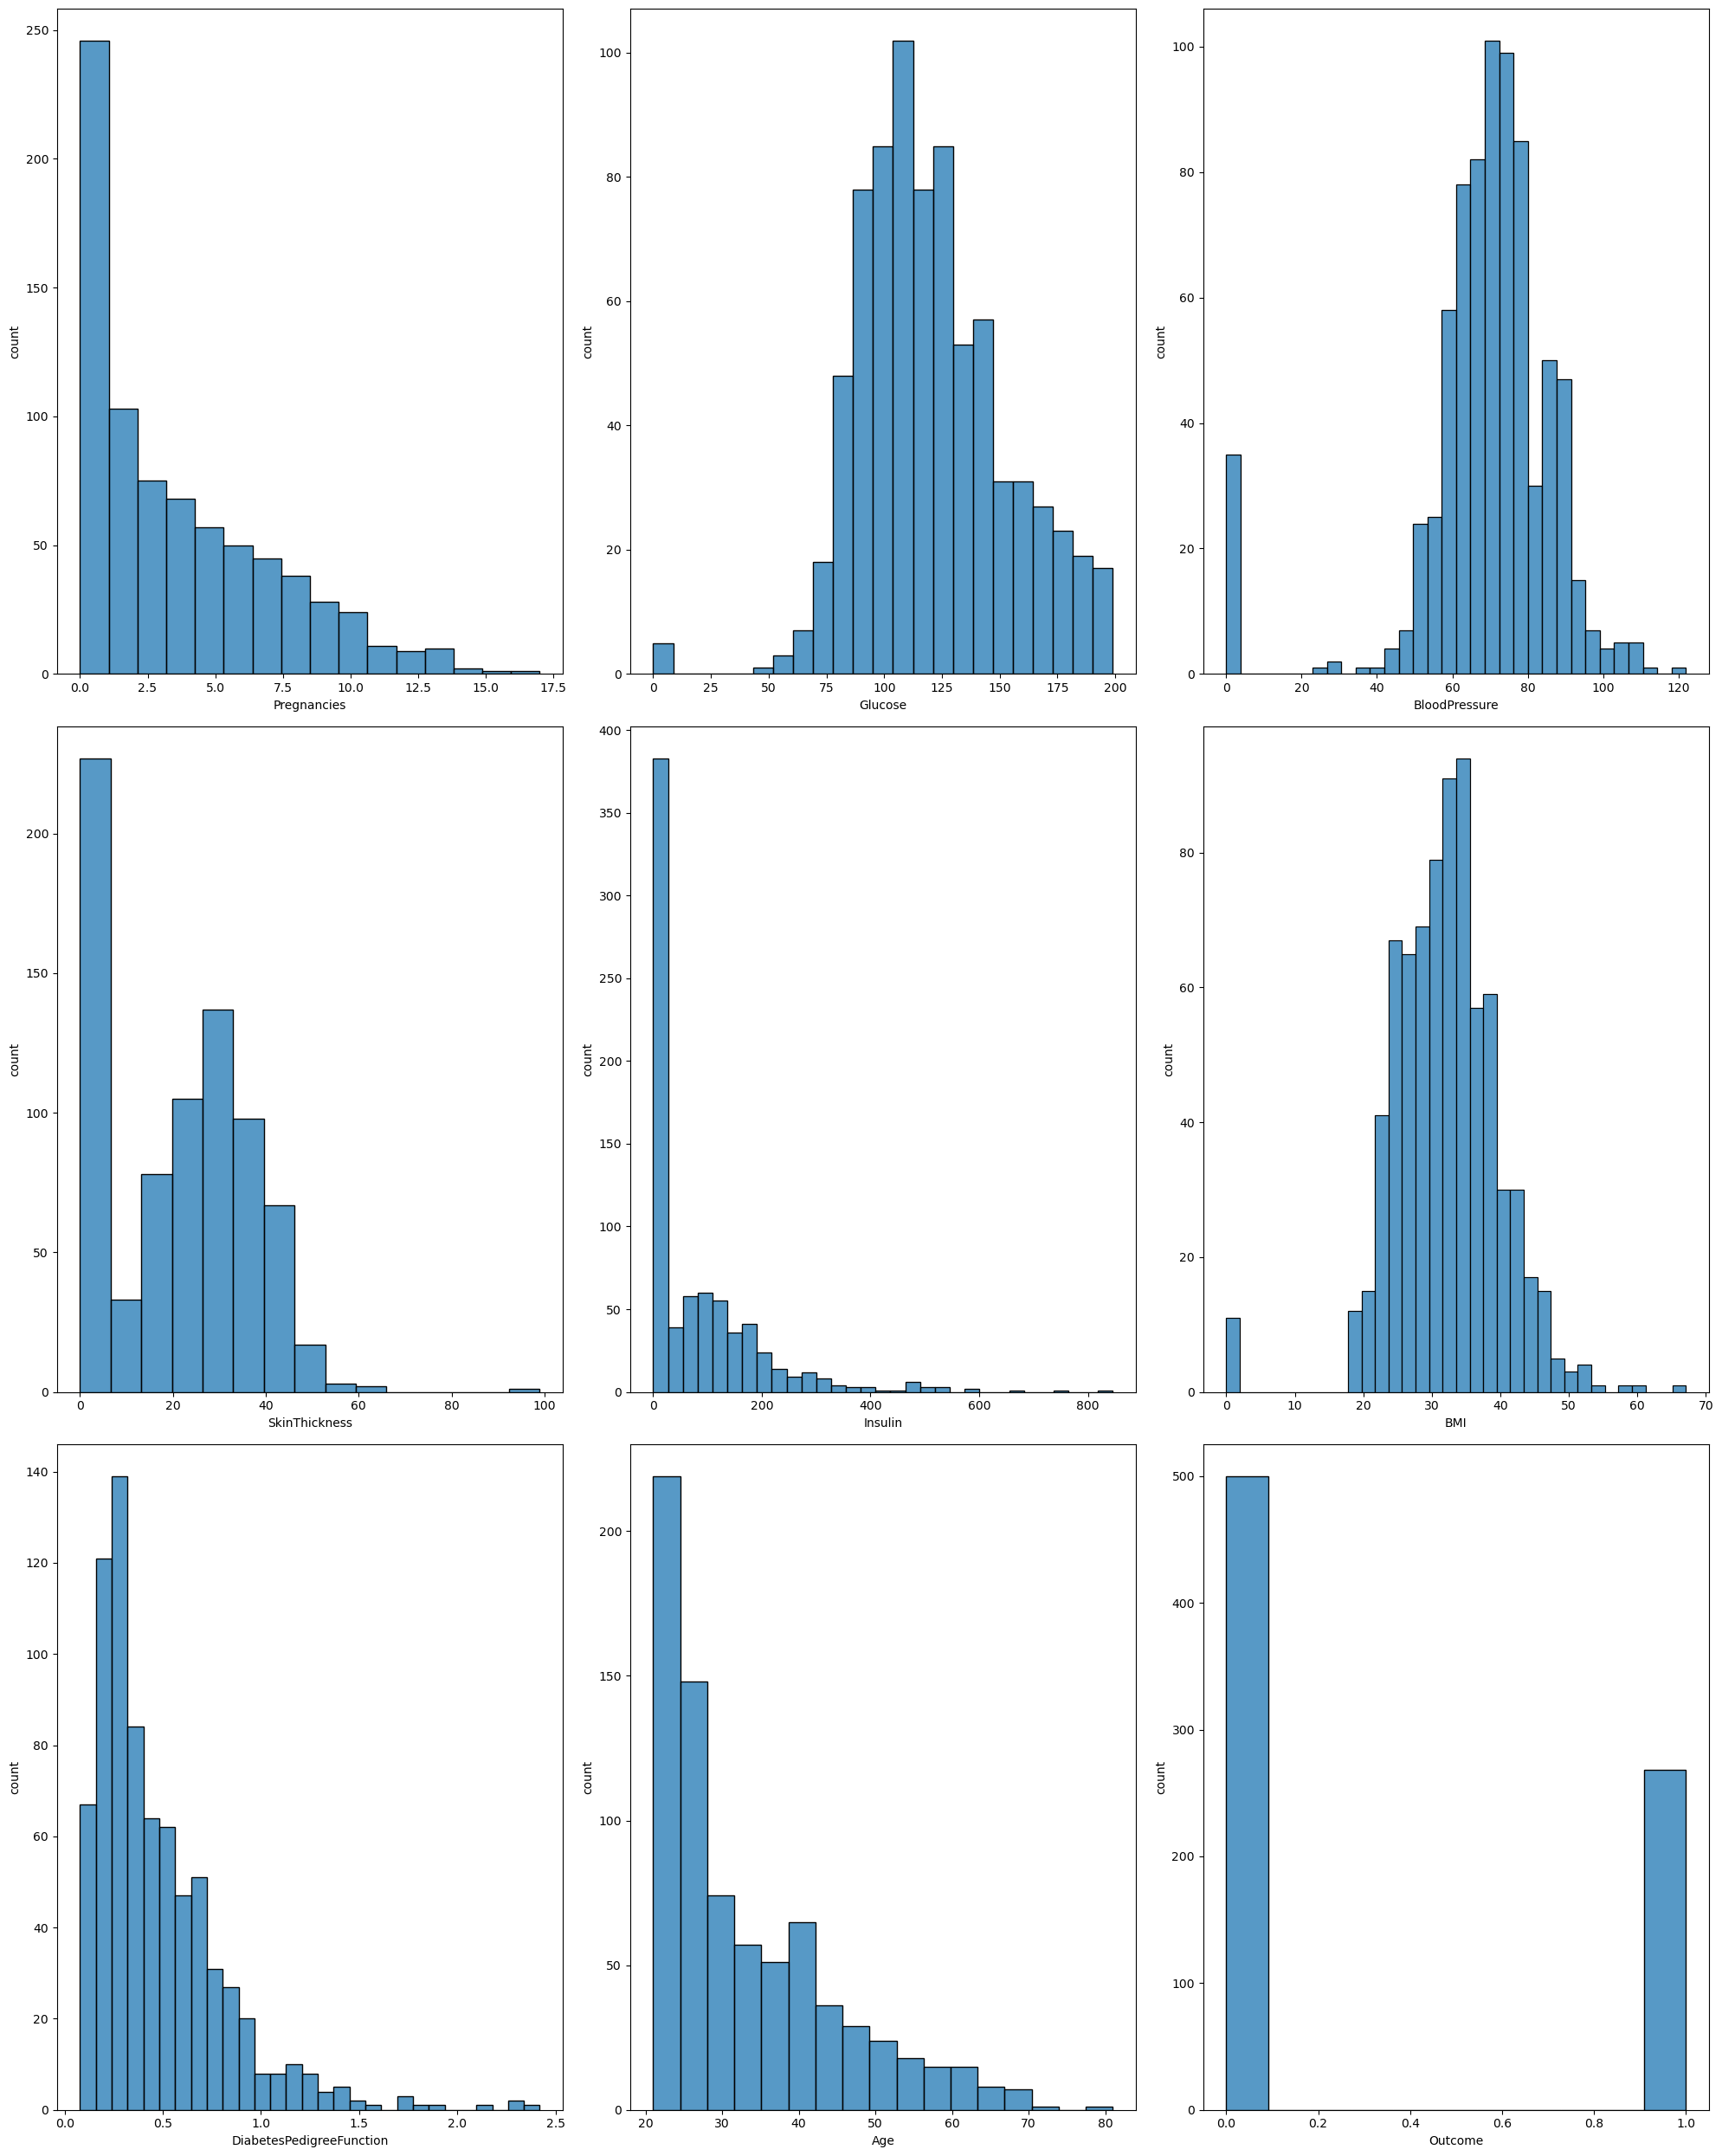

In [16]:
# Check the distribution of input variables
plt.figure(figsize=(20,25))
plotnumber = 1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column)
        plt.ylabel('count')
    plotnumber+=1
        
plt.tight_layout()

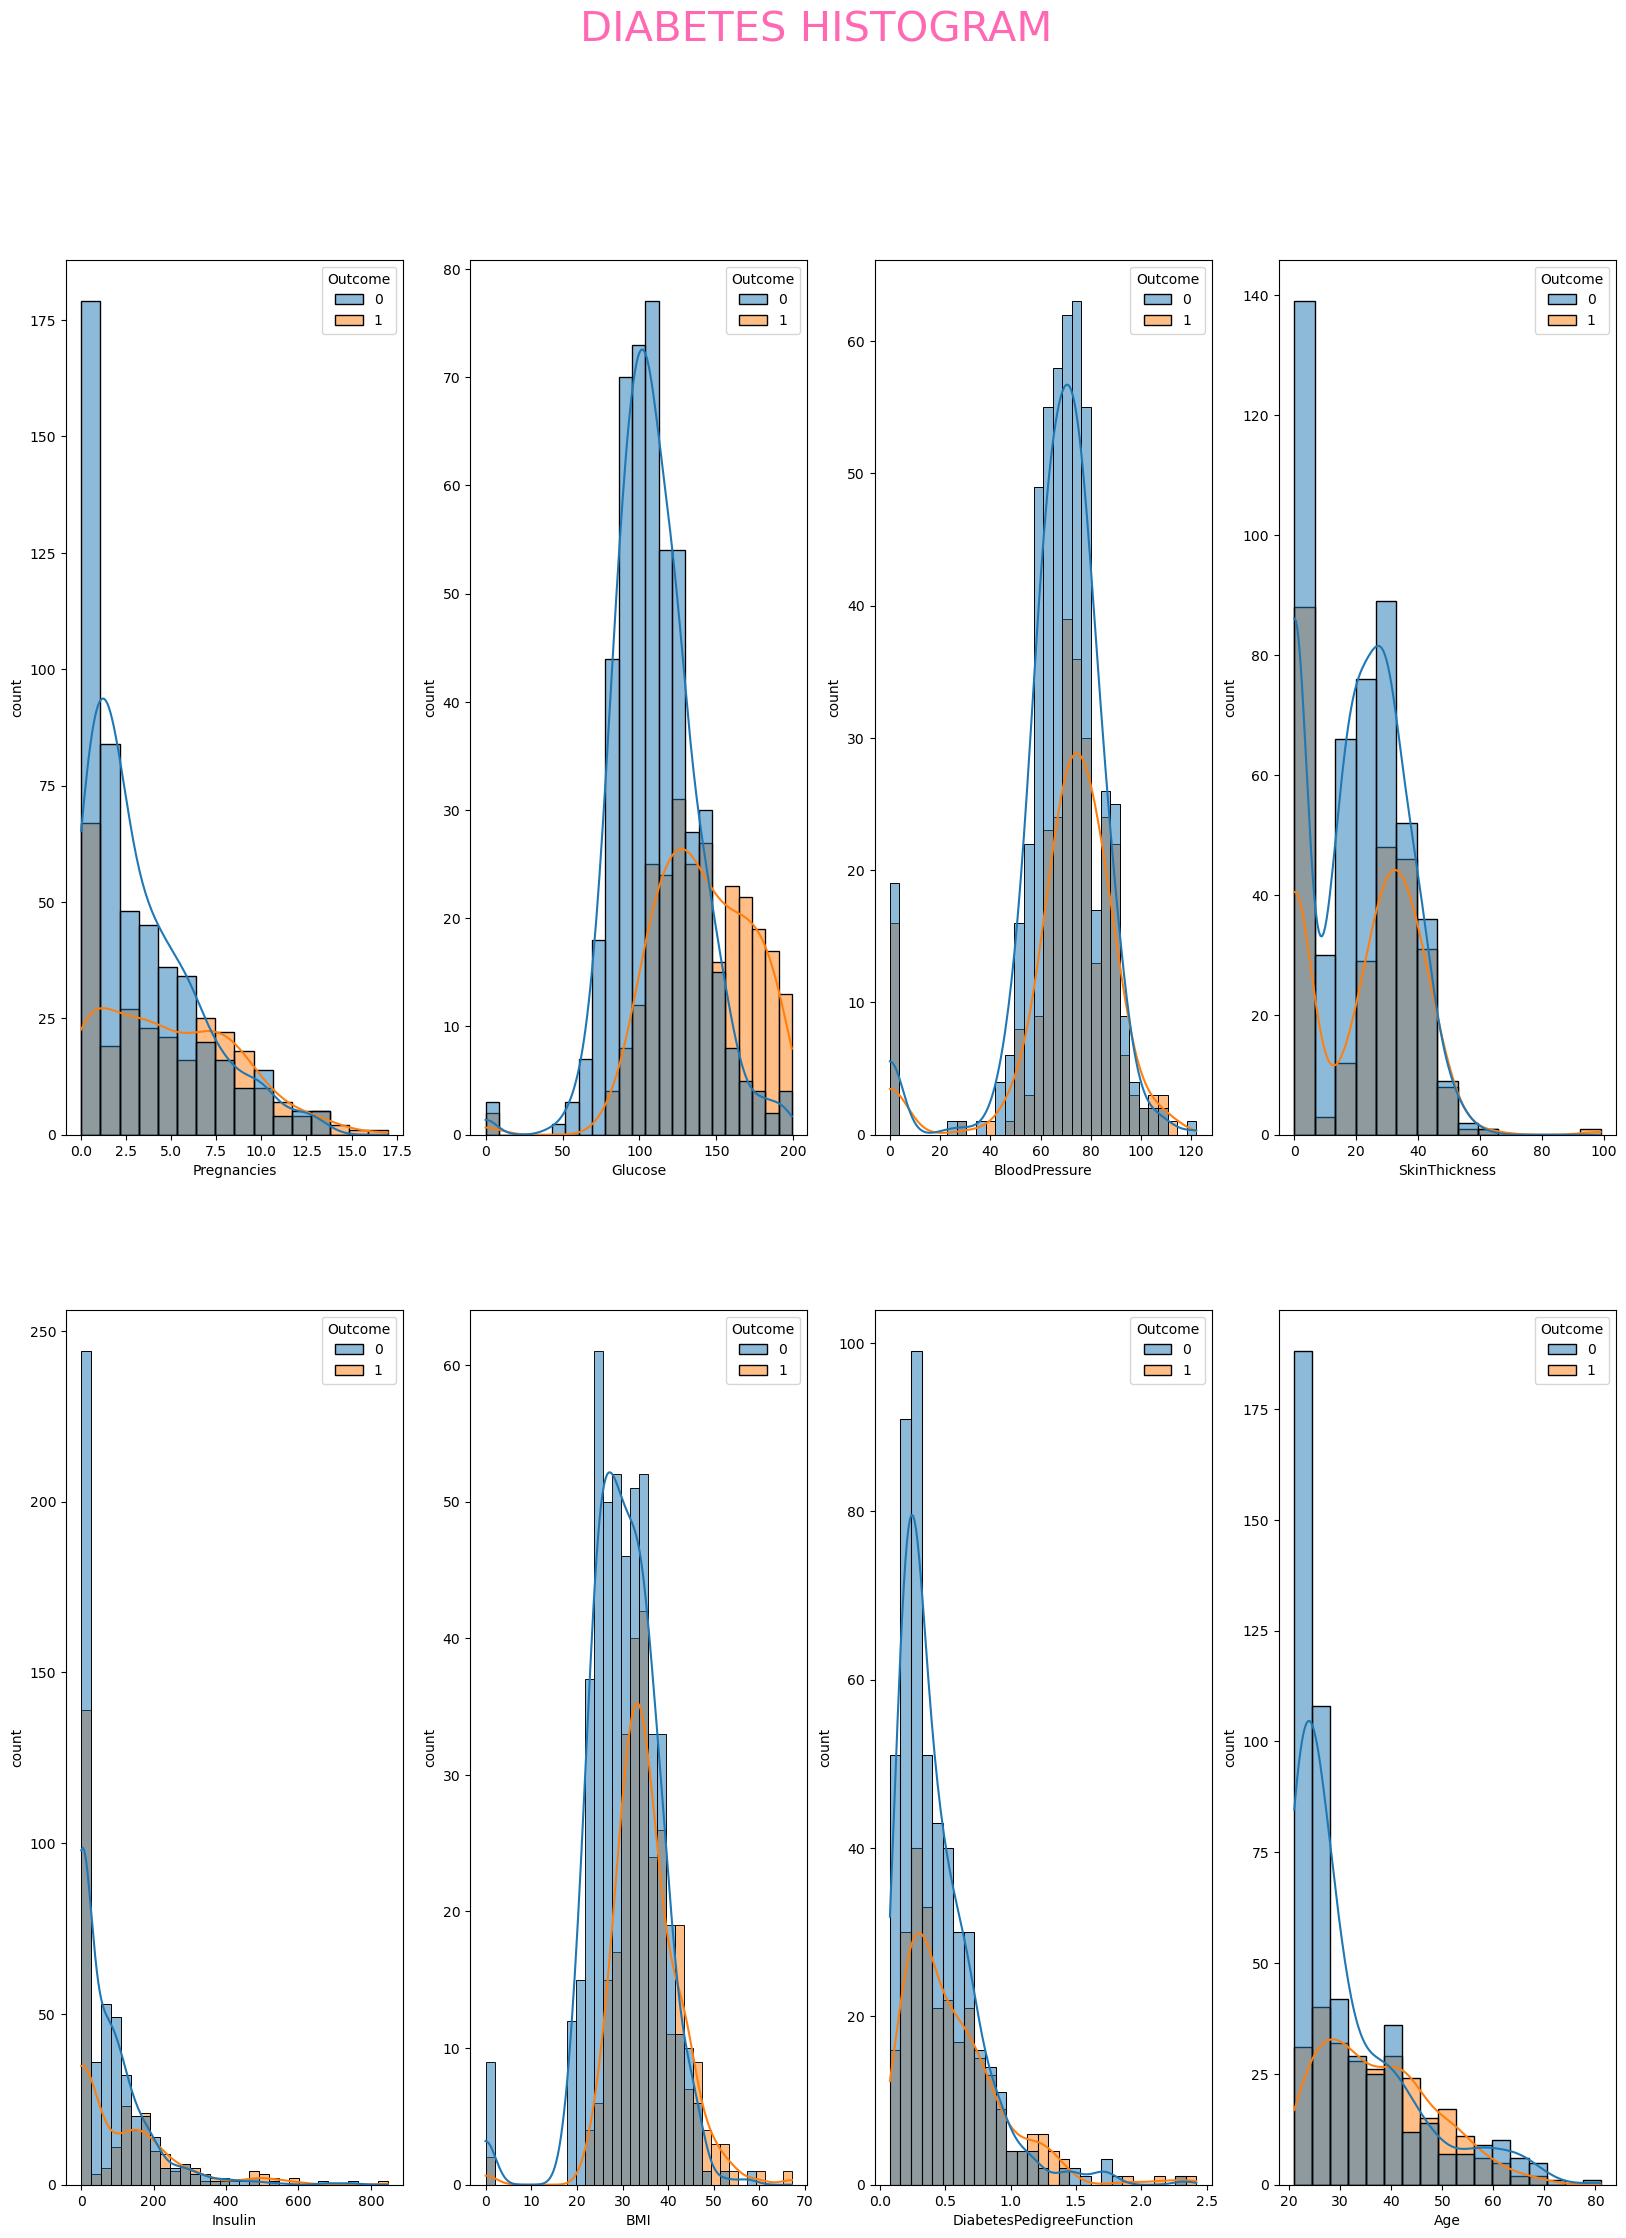

In [17]:
plt.figure(figsize=(20,25))
plotnumber = 1
for column in data:
    if plotnumber<=8:
        plt.suptitle('DIABETES HISTOGRAM',color='hotpink',fontsize=30)
        plt.subplot(2,4,plotnumber)
        sns.histplot(x=data[column],data=data,hue='Outcome',kde=True)
        plt.xlabel(column)
        plt.ylabel('count')
    plotnumber+=1
        


# Bivariate Analysis

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

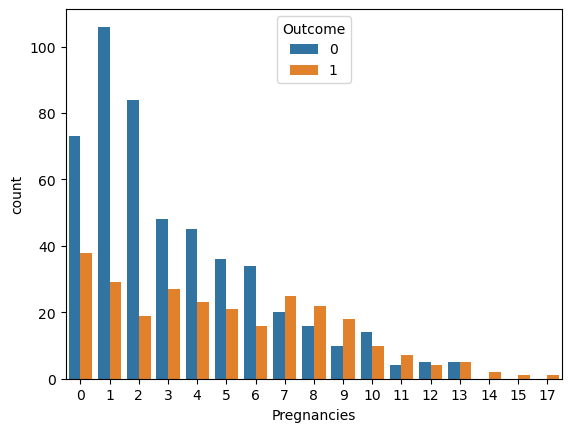

In [18]:
# Analyse how pregnancies will impact the patient with diabetes
sns.countplot(data=data,x='Pregnancies',hue='Outcome')

In [19]:
# Insights

# As the number of pregnancies is more then the probability of patient being diabetic is also high. 
# As the no.of.pregnancies is less then the probability of patient being diabetic is also less.
# The patient with 0 or 1 pregnancies will have very less chance of being diabetic.

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

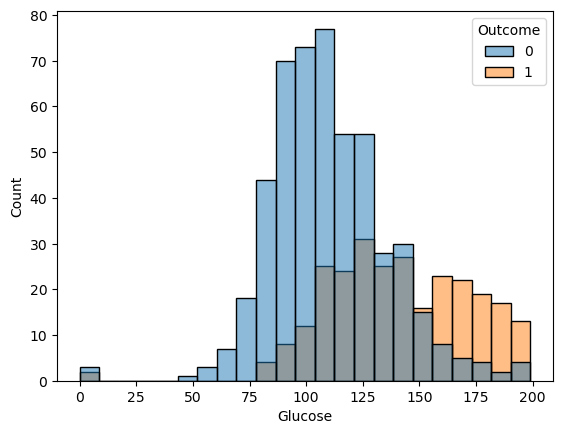

In [20]:
# Analyse relationship between glucose and diabetes

sns.histplot(data=data,x='Glucose',hue='Outcome')

In [21]:
# Insights

# Most of the patients glucose level in this data is between 80 to 140.
# The patients with less glucose level has very less chance of being diabetic.
# The patients with high glucose level has very high chance of being diabetic.
# The patients with glucose level above 120 are basically considered as diabetic patients.
# The patients who have glucose level below 120 are considered as non diabetic patients.

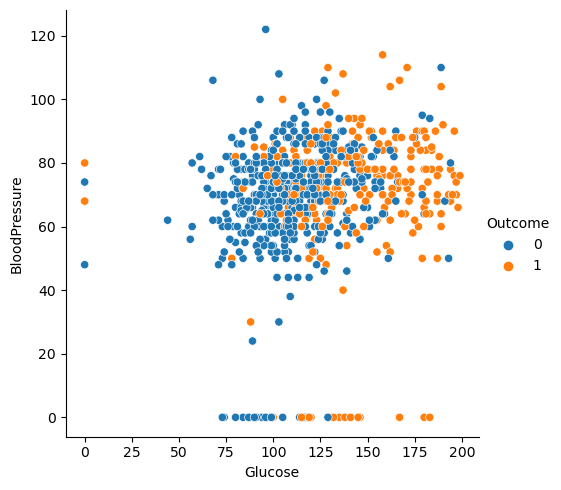

In [22]:
# Analyse glucose with Blood Pressure

sns.relplot(data=data,x='Glucose',y='BloodPressure',hue='Outcome')

In [23]:
# Insights

# The patients with normal glucose level will have normal BP,are non diabetic patients.
# The patients with low glucose level will have low BP, and they have very less chance of being diabetic.
# The patients with high glucose level will have high BP and they have high chance of being diabetic.
# The patients with glucose level greater than 125mg/l will have high chance of being diabetic.

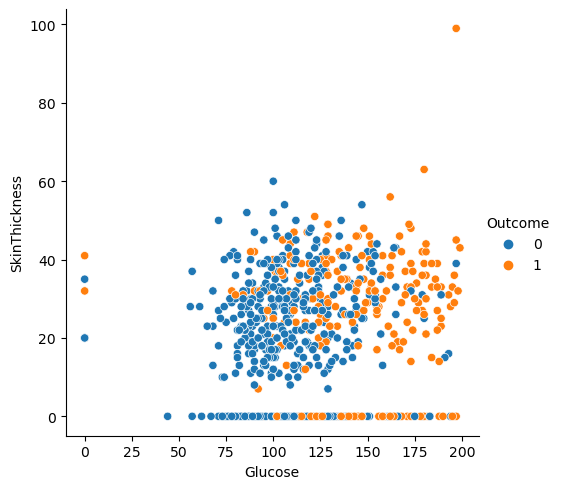

In [24]:
# Analyse glucose with skin thickness

sns.relplot(data=data,x='Glucose',y='SkinThickness',hue='Outcome')

In [25]:
# Insights

# The patients with 80 to 120 glucose level with skin thickness of 10 to 40 will have less chance of being diabetic
# The patients with glucose level more than 150 will have high chance of diabetic 
 

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

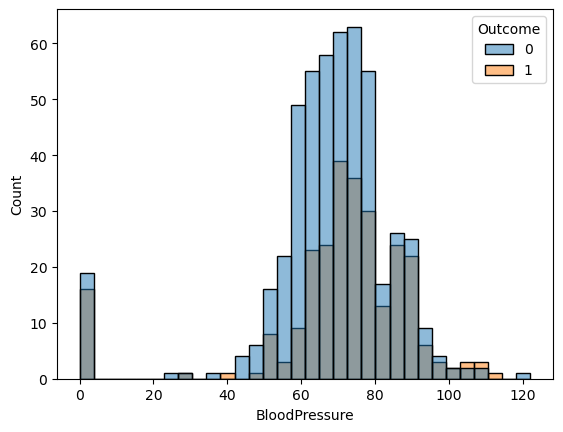

In [26]:
# Analysing Blood Pressure with outcome

sns.histplot(data=data,x='BloodPressure',hue='Outcome')

In [27]:
# Insights

# Persons with age above 100 will have the high chance of being diabetic
# Persons with age below 100 will have less chance of being diabetic
# 

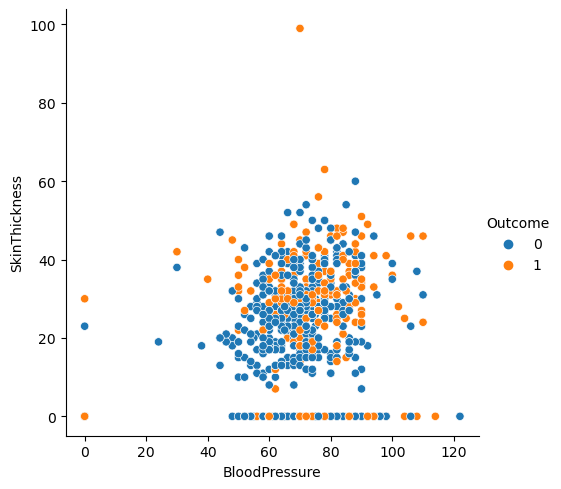

In [28]:
# Analyse BP with Skinthickness

sns.relplot(data=data,x='BloodPressure',y='SkinThickness',hue='Outcome')

In [29]:
# Insights

# Patients with skin thickness below 20 will have very less chance of being diabetic
# Patients with skin thickess above 20 will have high chance of being diabetic
# Patients with Blood pressure above 80 and and skin thickness above 30 will have high chance of being diabetic
# Patients with Blood pressure below 60 and skin thickness below 20 will have less chance of being diabetic


<AxesSubplot:xlabel='Insulin', ylabel='Count'>

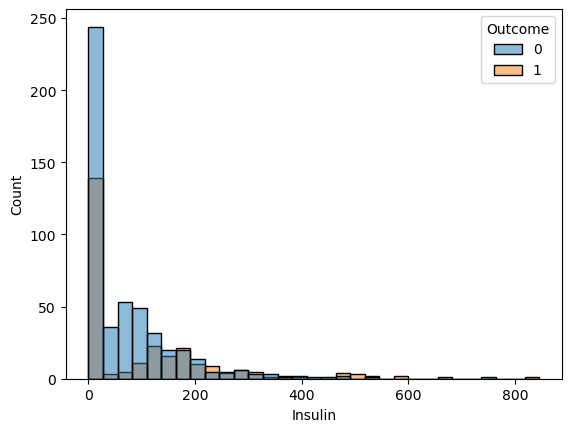

In [30]:
# Analyse Insulin with target

sns.histplot(data=data,x='Insulin',hue='Outcome')

In [31]:
# Insights

# Higher the insulin inthen there is a high chance of being diabetic
# Lesser the insulin then there is a less chance of being diabetic


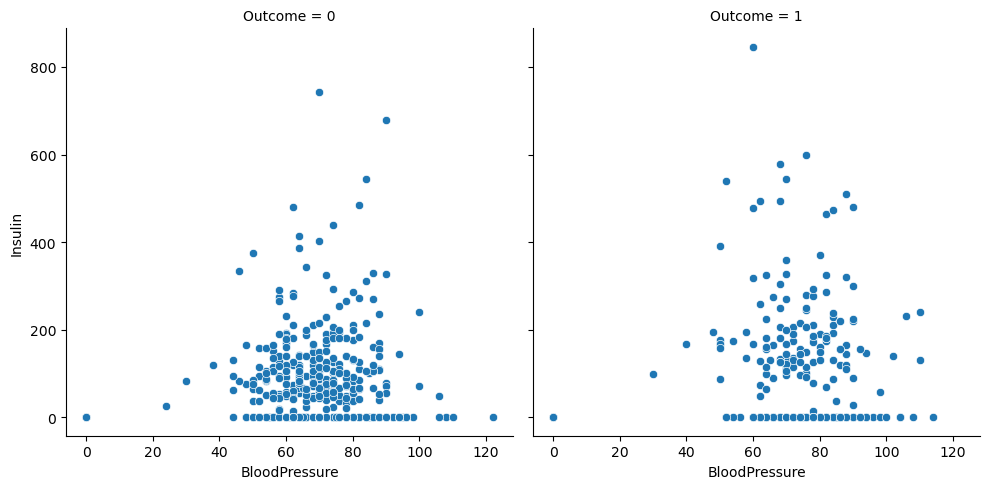

In [32]:
# Analyse insulin with Blood pressure

sns.relplot(data=data,x='BloodPressure',y='Insulin',col='Outcome')

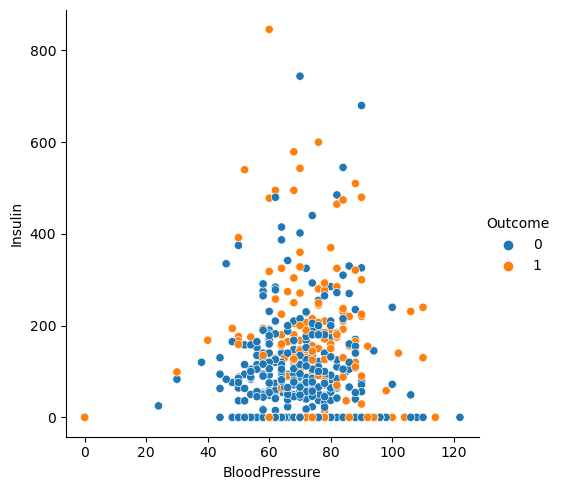

In [33]:
sns.relplot(data=data,x='BloodPressure',y='Insulin',hue='Outcome')

In [34]:
# Insights

# Lower the BP and Lower the insulin , the person has less chance of being diabetic
# Higher the BP and higher the insulin , the person has high chance of being diabetic
# Persons with Insulin level above 200 will have high chance of being diabetic

# Multivariate Analysis

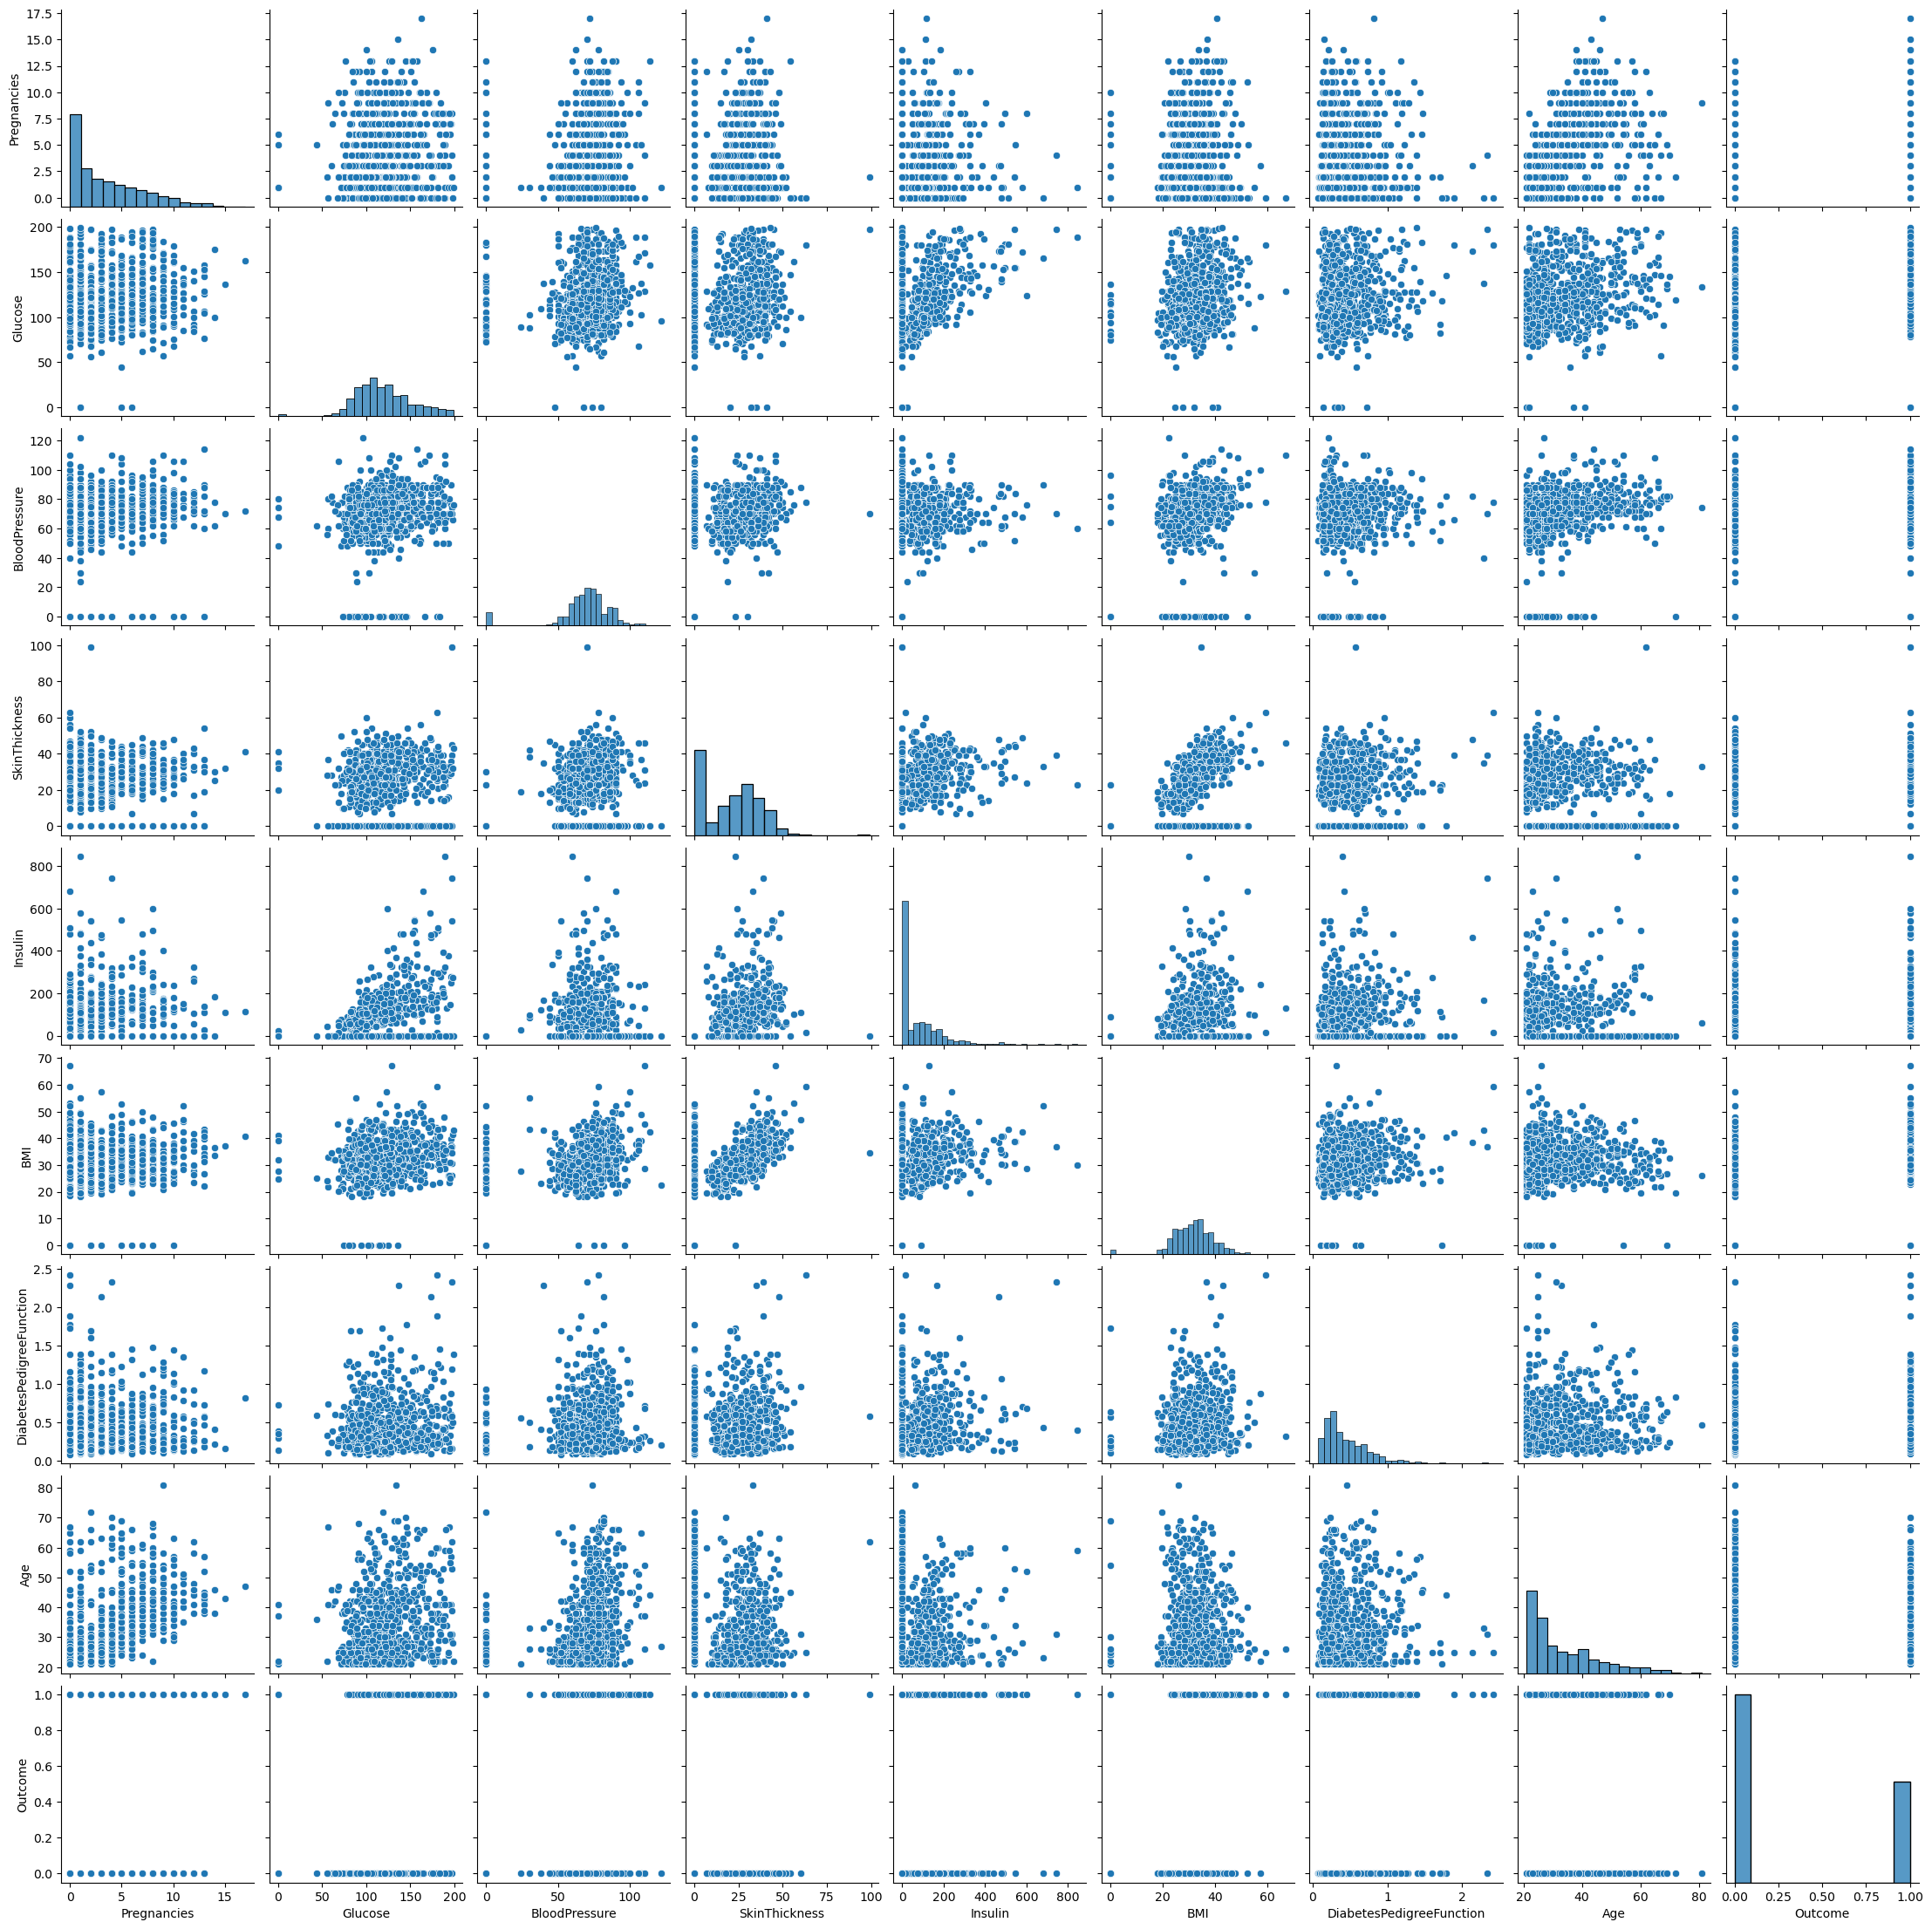

In [35]:
sns.pairplot(data)


# Data Preprocessing

In [36]:
# Check for missing values 

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
# Check for dupilcates
data.duplicated

<bound method DataFrame.duplicated of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.6

In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [39]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [40]:
# 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI'

# These columns have minimum value has zero and according to domain knowledge these values should not be zero
# It shows that data is corrupted hence replace all those zeros with median 

In [41]:
# data.loc[data['Glucose']==0,'Glucose'] = np.median

In [42]:
data.loc[data['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [43]:
# Replace 0 in Glucose column with median value
data.Glucose.replace(0,np.median(data.Glucose),inplace=True)

In [44]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.438286,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
# Replace 0 in Bloodpressure column with median value
data.BloodPressure.replace(0,np.median(data.BloodPressure),inplace=True)

In [46]:
# Replace 0 in skinthickness column with median value
data.SkinThickness.replace(0,np.median(data.SkinThickness),inplace=True)

In [47]:
# Replace 0 in Insulin column with median value
data.Insulin.replace(0,np.median(data.Insulin),inplace=True)

In [48]:
# Replace 0 in BMI column with median value
data.BMI.replace(0,np.median(data.BMI),inplace=True)

In [49]:
## Replace 0 in Insulin column with median value
# data.loc[data['Insulin']==0,'Insulin'] = np.median

In [50]:
## Replace 0 in BMI column with median value
#data.loc[data['BMI']==0,'BMI'] = np.median

In [51]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<AxesSubplot:>

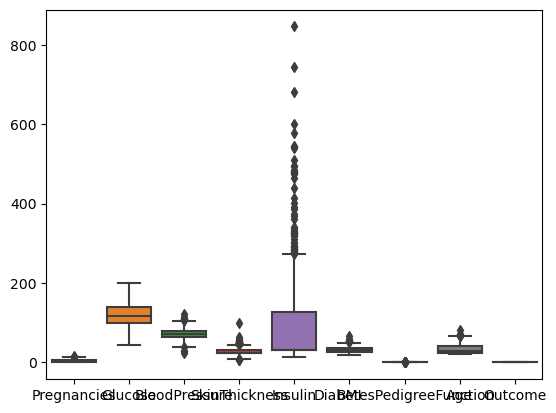

In [52]:
# Check for outliers

sns.boxplot(data=data)

AttributeError: module 'matplotlib.pyplot' has no attribute 'tight_layout_layout'

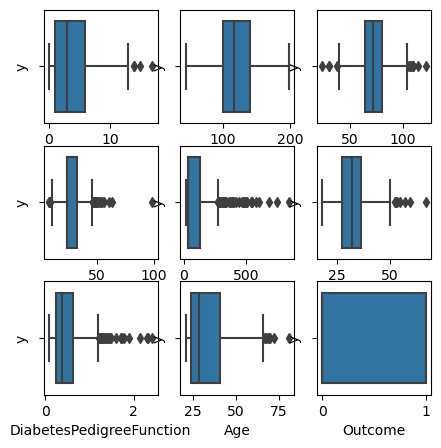

In [53]:
# Check for outliers

plt.figure(figsize=(5,5))
plotnumber=1

for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
        plt.ylabel('y')    
    plotnumber+=1
    
plt.tight_layout_layout()

# Scaling

- Scaling is one of the preprocessing method that we apply on continuous input variables to bring down values into certain scale

- Types

  1.Normalization
    ->Minmax scaler
    ->It brings down values between 0 and 1,range=[0,1]
    ->Formula=> minmax=x-xmin/xmax-xmin
    
  2.Standardization
    ->Standardscaler
    -> It brings down values between -3 and 3
    -> Formula (z)z-score = x-mean/sigma(standard deviation),
    -> After applying.,, checking the values,, the condition should be [ mean=0 and sigma =1 ]

In [ ]:
# Scaling

# Scaling is applied on continuous independent variables.
# In this data we are not applying scaling on pregnancies and outcome because outcome has discrete values, 
# and in pregnancies column we dont see much variation among observations.
# We never apply scaling on target column in classification problem.

# MinMax Scaler 

In [54]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [55]:
# Apply Min max scaler 
# import minmax model
from sklearn.preprocessing import MinMaxScaler

# initialize the model
sc=MinMaxScaler()
data1=sc.fit_transform(data.drop(['Outcome','Pregnancies'],axis=1))

In [56]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [57]:
new_data=pd.DataFrame(data1,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [58]:
new_data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333


In [59]:
data2=data[['Pregnancies','Outcome']]
data2

,Pregnancies,Outcome
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [60]:
MMS_scaled_data=pd.concat([new_data,data2],axis=1)
MMS_scaled_data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,6,1
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,1,0
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,8,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,1,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0,1
...,...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,10,0
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000,2,0
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,5,0
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333,1,1


# Standard Scalar



In [61]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
data3=sc1.fit_transform(data.drop(['Outcome','Pregnancies'],axis=1))
new_data1=pd.DataFrame(data3,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
data2=data[['Pregnancies','Outcome']]
SS_scaled_data=pd.concat([new_data1,data2],axis=1)
SS_scaled_data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995,6,1
1,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672,1,0
2,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584,8,1
3,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549,1,0
4,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496,0,1
...,...,...,...,...,...,...,...,...,...
763,-0.679069,0.298896,2.240633,0.809145,0.065361,-0.908682,2.532136,10,0
764,0.011301,-0.197433,-0.036283,-0.608201,0.632973,-0.398282,-0.531023,2,0
765,-0.021574,-0.031990,-0.469981,0.164466,-0.909768,-0.685193,-0.275760,5,0
766,0.142800,-1.024647,-0.469981,-0.608201,-0.342155,-0.371101,1.170732,1,1


# Feature Engineering

In [62]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


<AxesSubplot:>

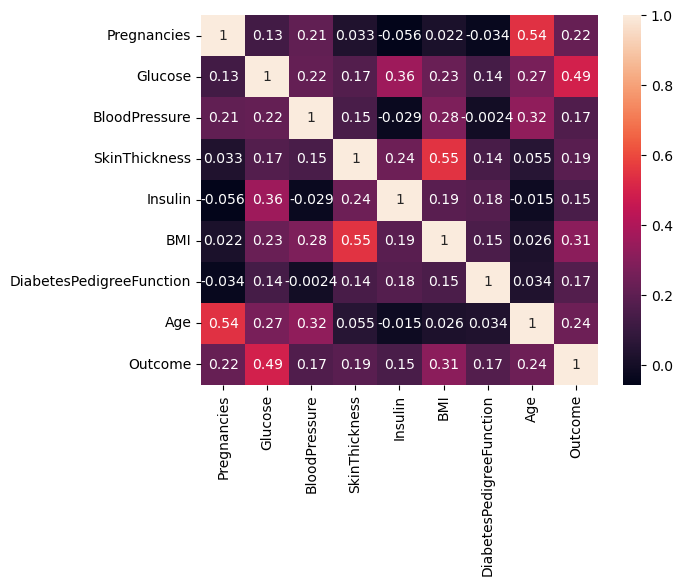

In [63]:
# Heatmap

sns.heatmap(data.corr(),annot=True)

<AxesSubplot:>

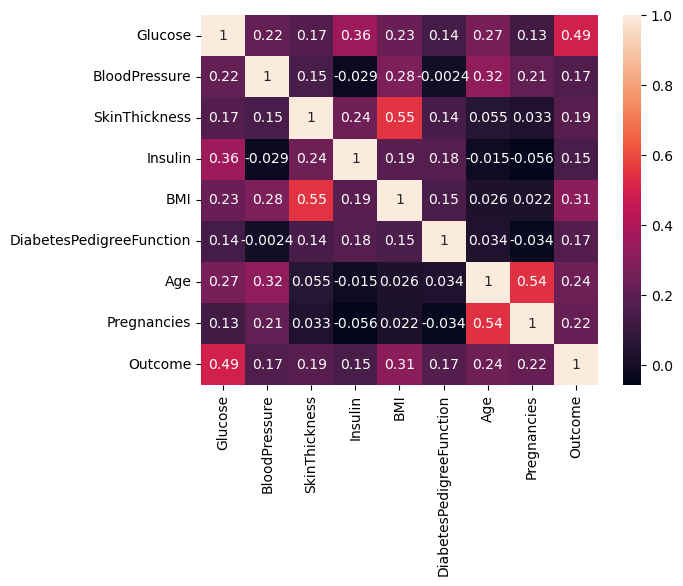

In [64]:
sns.heatmap(SS_scaled_data.corr(),annot=True)

In [65]:
# Since there is no high correlation among independent variables we are not dropping any of the column.
# No or little multicollinearity is checked and its satisfied.

In [66]:
# Split data into X and y

X=SS_scaled_data.drop('Outcome',axis=1)
y=SS_scaled_data.Outcome

In [67]:
# Split data for training and testing

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

In [68]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


# Applying Logistic Regression model

In [69]:
# import model

from sklearn.linear_model import LogisticRegression

# Initialize the model

model=LogisticRegression()

# Train model

model.fit(x_train,y_train)

LogisticRegression()

# Standard Scaled value model

In [70]:
y_predict=model.predict(x_test)

In [71]:
model.predict_proba(x_test)

array([[0.45652249, 0.54347751],
       [0.7600038 , 0.2399962 ],
       [0.55065133, 0.44934867],
       [0.92869606, 0.07130394],
       [0.90608364, 0.09391636],
       [0.96431954, 0.03568046],
       [0.92979623, 0.07020377],
       [0.70632708, 0.29367292],
       [0.94565615, 0.05434385],
       [0.65000895, 0.34999105],
       [0.94723468, 0.05276532],
       [0.78676043, 0.21323957],
       [0.06871583, 0.93128417],
       [0.68468611, 0.31531389],
       [0.90040634, 0.09959366],
       [0.29119641, 0.70880359],
       [0.19360141, 0.80639859],
       [0.94999127, 0.05000873],
       [0.90108617, 0.09891383],
       [0.06147125, 0.93852875],
       [0.69776696, 0.30223304],
       [0.51936667, 0.48063333],
       [0.65934785, 0.34065215],
       [0.84360417, 0.15639583],
       [0.86806026, 0.13193974],
       [0.28059318, 0.71940682],
       [0.69082019, 0.30917981],
       [0.56289631, 0.43710369],
       [0.50616745, 0.49383255],
       [0.17048802, 0.82951198],
       [0.

In [72]:
pd.DataFrame(model.predict_proba(x_test))

# Its a probability percentage of person being diabetic and non-diabetic

,0,1
0,0.456522,0.543478
1,0.760004,0.239996
2,0.550651,0.449349
3,0.928696,0.071304
4,0.906084,0.093916
...,...,...
226,0.411270,0.588730
227,0.094210,0.905790
228,0.727453,0.272547
229,0.857540,0.142460


In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [74]:
accuracy_score(y_test,y_predict)

0.7359307359307359

In [75]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       144
           1       0.72      0.48      0.58        87

    accuracy                           0.74       231
   macro avg       0.73      0.69      0.69       231
weighted avg       0.73      0.74      0.72       231



In [76]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Outcome,,
0,128,16
1,45,42


# MinMax Scaling value model

In [77]:
X1=MMS_scaled_data.drop('Outcome',axis=1)
y1=MMS_scaled_data.Outcome

In [78]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.30,random_state=10)

In [79]:
model=LogisticRegression()
model.fit(x1_train,y1_train)

LogisticRegression()

In [80]:
y1_predict=model.predict(x1_test)

In [81]:
accuracy_score(y1_test,y1_predict)

0.7359307359307359

In [82]:
pd.crosstab(y1_test,y1_predict)

col_0,0,1
Outcome,,
0,132,12
1,49,38


In [83]:
print(classification_report(y1_test,y1_predict))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81       144
           1       0.76      0.44      0.55        87

    accuracy                           0.74       231
   macro avg       0.74      0.68      0.68       231
weighted avg       0.74      0.74      0.72       231



### EEEnd

In [84]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [85]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [86]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()

x_train_smote,y_train_smote=smote.fit_resample(x_train.astype('float'),y_train)



In [87]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(712, 8)
(712,)


In [88]:
from collections import Counter

print(Counter(y_train))

print(Counter(y_train_smote))

Counter({0: 356, 1: 181})
Counter({0: 356, 1: 356})


In [89]:
model=LogisticRegression(max_iter=1000,C=5.0)

model.fit(x_train_smote,y_train_smote)

y2_predict=model.predict(x_test)

In [90]:
accuracy_score(y_test,y2_predict)

0.7532467532467533

In [91]:
confusion_matrix(y_test,y2_predict)

array([[113,  31],
       [ 26,  61]], dtype=int64)

In [92]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       144
           1       0.72      0.48      0.58        87

    accuracy                           0.74       231
   macro avg       0.73      0.69      0.69       231
weighted avg       0.73      0.74      0.72       231



In [93]:
print(classification_report(y_test,y2_predict))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       144
           1       0.66      0.70      0.68        87

    accuracy                           0.75       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.75      0.75       231



# Grid search

In [94]:
from sklearn.model_selection import GridSearchCV


In [95]:
hyperpara=[{'C':[5,10,15,20,25,30],'max_iter':[1000,2000,3000,4000,5000,6000]}]
           
grid=GridSearchCV(estimator=LogisticRegression(),param_grid=hyperpara,cv=5,scoring='accuracy')
           
grid.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [5, 10, 15, 20, 25, 30],
                          'max_iter': [1000, 2000, 3000, 4000, 5000, 6000]}],
             scoring='accuracy')

In [96]:
print(grid.best_score_)
print(grid.best_params_)

0.7643663526016468
{'C': 5, 'max_iter': 1000}


# Precision,Recall,F1-score

In [97]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [98]:
precision_score(y_test,y_predict)

0.7241379310344828

In [99]:
precision_score(y_test,y2_predict)

0.6630434782608695

In [100]:
recall_score(y_test,y_predict)

0.4827586206896552

In [101]:
recall_score(y_test,y2_predict)

0.7011494252873564

In [102]:
f1_score(y_test,y_predict)

0.5793103448275863

In [103]:
f1_score(y_test,y2_predict)

0.6815642458100558

# ROC-AUC
- Reciever operator caharacteristics
- Area Under the curve

* It is one of the classification metrics that we use for Binary classification in order to evaluate the model at different thresholds
* It calculates False postive rate(FPR) and True positive rate(TPR)
* FPR(Specificity) =FP/FP+TN
* TPR(Recall)=TP/TP+FN


 ## AUC
* AUC[0,1]
* Curve measures how good is your model
* It tells how well the model has classified 0 classes 0 and 1 classes 1
* More the area below the ROC curve,better the model
* if auc is near to 1 , the model is good
* If AUC is near to 0, the model is bad
* AUC should be high, thats gives the best model

In [121]:
model.predict_proba(x_test)

array([[0.29051771, 0.70948229],
       [0.64465279, 0.35534721],
       [0.35903987, 0.64096013],
       [0.87059769, 0.12940231],
       [0.84604157, 0.15395843],
       [0.94168868, 0.05831132],
       [0.88338833, 0.11661167],
       [0.55683536, 0.44316464],
       [0.90721796, 0.09278204],
       [0.47487796, 0.52512204],
       [0.91655819, 0.08344181],
       [0.7069294 , 0.2930706 ],
       [0.02669077, 0.97330923],
       [0.5620472 , 0.4379528 ],
       [0.83923906, 0.16076094],
       [0.15758083, 0.84241917],
       [0.07874819, 0.92125181],
       [0.92363117, 0.07636883],
       [0.85056736, 0.14943264],
       [0.01728968, 0.98271032],
       [0.52326084, 0.47673916],
       [0.37565392, 0.62434608],
       [0.4870598 , 0.5129402 ],
       [0.7545683 , 0.2454317 ],
       [0.80453536, 0.19546464],
       [0.15937278, 0.84062722],
       [0.55192416, 0.44807584],
       [0.37951608, 0.62048392],
       [0.30766165, 0.69233835],
       [0.07955326, 0.92044674],
       [0.

In [125]:
from sklearn.metrics import roc_auc_score,roc_curve

# auc scores

pred_prob = model.predict_proba(x_test)
auc_score = roc_auc_score(y_test,pred_prob[:,1]) # taking only the 2nd column that means the probability of person with diabetic

print(auc_score)

0.8291826309067689


In [130]:
pred_prob1 = model.predict_proba(x1_test)
auc_score1 = roc_auc_score(y1_test,pred_prob1[:,1])

print(auc_score)

0.8002075351213283


In [136]:
# Find fpr and tpr at various thresholds
fpr1,tpr1,thresh=roc_curve(y_test,pred_prob[:,1],pos_label=1)
# pos_label-->  Positive label -> its a positive label of 1 and it takes the class 1

In [132]:
tpr1

array([0.        , 0.01149425, 0.09195402, 0.09195402, 0.10344828,
       0.10344828, 0.14942529, 0.14942529, 0.16091954, 0.16091954,
       0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.24137931,
       0.24137931, 0.27586207, 0.27586207, 0.28735632, 0.28735632,
       0.29885057, 0.29885057, 0.31034483, 0.31034483, 0.33333333,
       0.33333333, 0.37931034, 0.37931034, 0.44827586, 0.44827586,
       0.48275862, 0.48275862, 0.57471264, 0.57471264, 0.5862069 ,
       0.5862069 , 0.59770115, 0.59770115, 0.63218391, 0.63218391,
       0.65517241, 0.65517241, 0.66666667, 0.66666667, 0.68965517,
       0.68965517, 0.70114943, 0.70114943, 0.71264368, 0.71264368,
       0.72413793, 0.72413793, 0.73563218, 0.73563218, 0.75862069,
       0.75862069, 0.77011494, 0.77011494, 0.81609195, 0.81609195,
       0.82758621, 0.82758621, 0.83908046, 0.83908046, 0.85057471,
       0.85057471, 0.86206897, 0.86206897, 0.88505747, 0.88505747,
       0.91954023, 0.91954023, 0.93103448, 0.93103448, 0.95402

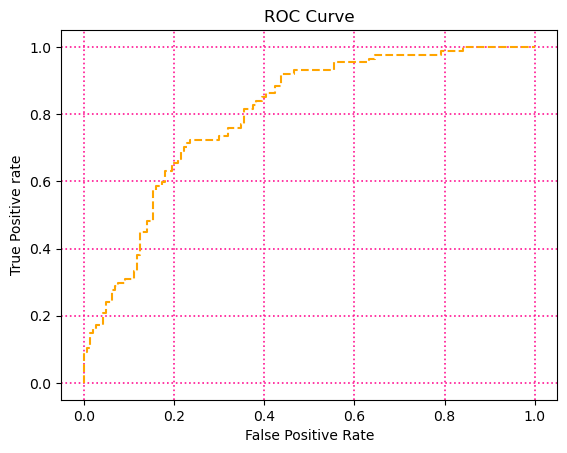

In [168]:
plt.plot(fpr1,tpr1, linestyle='--', color='orange' ,label = 'Logistic regression')

# title 
plt.title('ROC Curve')

# X-label
plt.xlabel('False Positive Rate')

# Y-Label
plt.ylabel('True Positive rate')

plt.grid(c='deeppink',ls=':',lw=1.2)
plt.show()

In [133]:
fpr1,tpr1,thresh=roc_curve(y_test,pred_prob1[:,1],pos_label=1) 

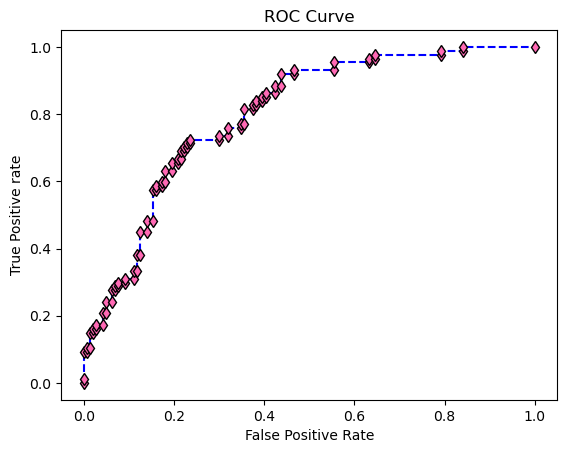

In [169]:
plt.plot(fpr1,tpr1, 'd--b',mec='k',mfc='hotpink' ,label = 'Logistic regression')

# title 
plt.title('ROC Curve')

# X-label
plt.xlabel('False Positive Rate')

# Y-Label
plt.ylabel('True Positive rate')

plt.show()

# Advantages

- It is easy and simple to implement 
- It works well in Binary classification
- It works well with huge data
- It overcomes overfitting using regularization

# Disadvantages

- It wont work with multiclassification 
- Scaling and normalization is important to build logistic
- Outliers should be handled
- No or little multicollinearity

# Applications

- Medicine domain--> Diabetic,Cancer,Cardiac,Covid
- Banking and finance--> Credit card ,Loan approved, Fraud detection
- Business

# Iris dataset - Failure 

-  Iris dataset has 3 output categories 
- It will not work with Logistic regression,
- As said , the model overfits to the iris dataset

In [104]:
from sklearn.datasets import load_iris

iris=load_iris


In [105]:
X,y=iris(return_X_y=True)


In [106]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [107]:
print(x2_train.shape)
print(x2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [108]:
model_lr=LogisticRegression()
model_lr.fit(x2_train,y2_train)

LogisticRegression()

In [109]:
y_pred=model_lr.predict(x2_test)

In [110]:
y_pred

array([0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0,
       1, 1, 0, 0, 2, 2, 2, 1])

In [111]:
y2_test

array([0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0,
       1, 1, 0, 0, 2, 2, 2, 1])

In [112]:
confusion_matrix(y2_test,y_pred)

array([[ 8,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  9]], dtype=int64)

In [113]:
accuracy_score(y2_test,y_pred)

1.0

In [114]:
print(classification_report(y2_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [115]:
pd.crosstab(y2_test,y_pred,colnames=['predicted'],rownames=['actual'],margins=True)

predicted,0,1,2,All
actual,,,,
0,8,0,0,8
1,0,13,0,13
2,0,0,9,9
All,8,13,9,30


In [116]:
# As said, the output shows clearly the model overfits to the multiclassifiacation problems 